In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from constants import LATIN_AMERICAN_COUNTRIES

In [4]:
SolarEnergy = '../../data/row_data/solar-energy-consumption.csv'
DataSolarEnergy = pd.read_csv(SolarEnergy)

EnerConvCol = '../../data/row_data/datos_energias_convencionales_Colombia.csv'
DataEnerConvCol = pd.read_csv(EnerConvCol)

RenewShareEnergy = '../../data/row_data/renewable-share-energy.csv'
DataRenewShareEnergy = pd.read_csv(RenewShareEnergy)

EnergyDataRenewCons = '../../data/row_data/modern-renewable-energy-consumption.csv'
DataRenewCons = pd.read_csv(EnergyDataRenewCons)

EnergyRenewProd= '../../data/row_data/modern-renewable-prod.csv'
DataRenewProd = pd.read_csv(EnergyRenewProd)

Gráfico Barras Consumo de Energia Solar LATAM

Index(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica',
       'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala',
       'Haiti', 'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay',
       'Peru', 'Uruguay', 'Venezuela'],
      dtype='object', name='Entity')


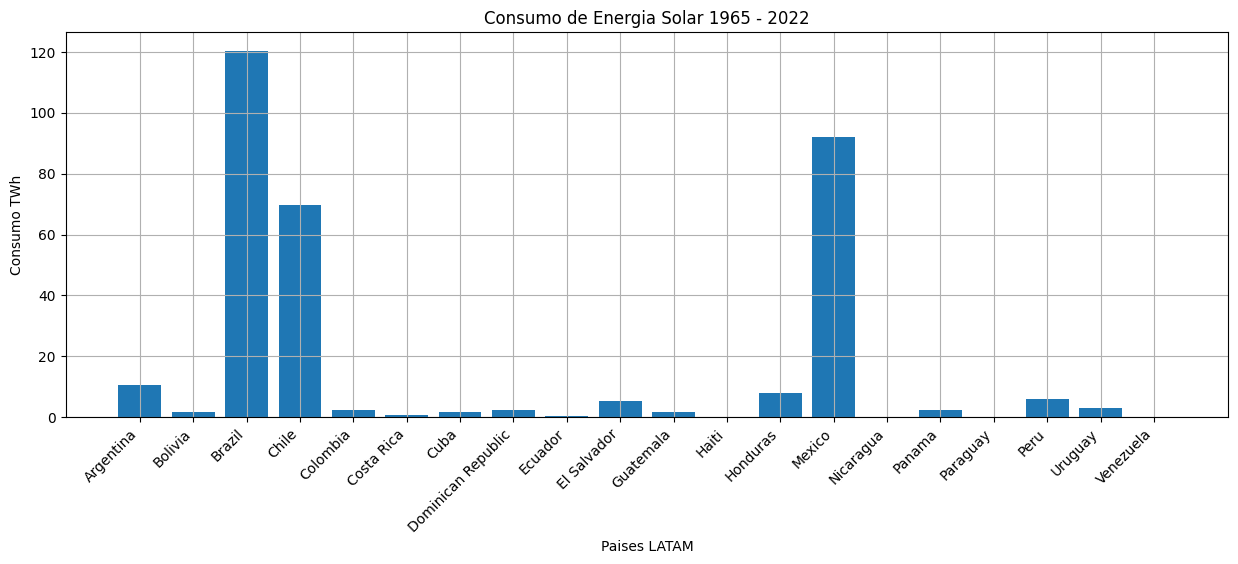

In [3]:
LATAM = DataSolarEnergy.groupby('Entity') 
EnergySolarCons = DataSolarEnergy[DataSolarEnergy['Entity'].isin(LATIN_AMERICAN_COUNTRIES)]
TotalEnergySolarCons = EnergySolarCons.groupby('Entity').sum().iloc[:,2]
TotalEnergySolarCons

print(TotalEnergySolarCons.index)

plt.figure(figsize=(15,5))
plt.bar(TotalEnergySolarCons.index, TotalEnergySolarCons.values)
plt.title('Consumo de Energia Solar 1965 - 2022')
plt.tick_params(axis='x', labelsize=10)
plt.xticks(rotation=45, ha="right")
plt.ylabel('Consumo TWh')
plt.xlabel('Paises LATAM')
plt.grid()



Gráfico de Barras: Producción de Energía Renovable por Fuente

●      Descripción: Muestra la cantidad de energía producida por cada fuente renovable.

<Figure size 2000x1000 with 0 Axes>

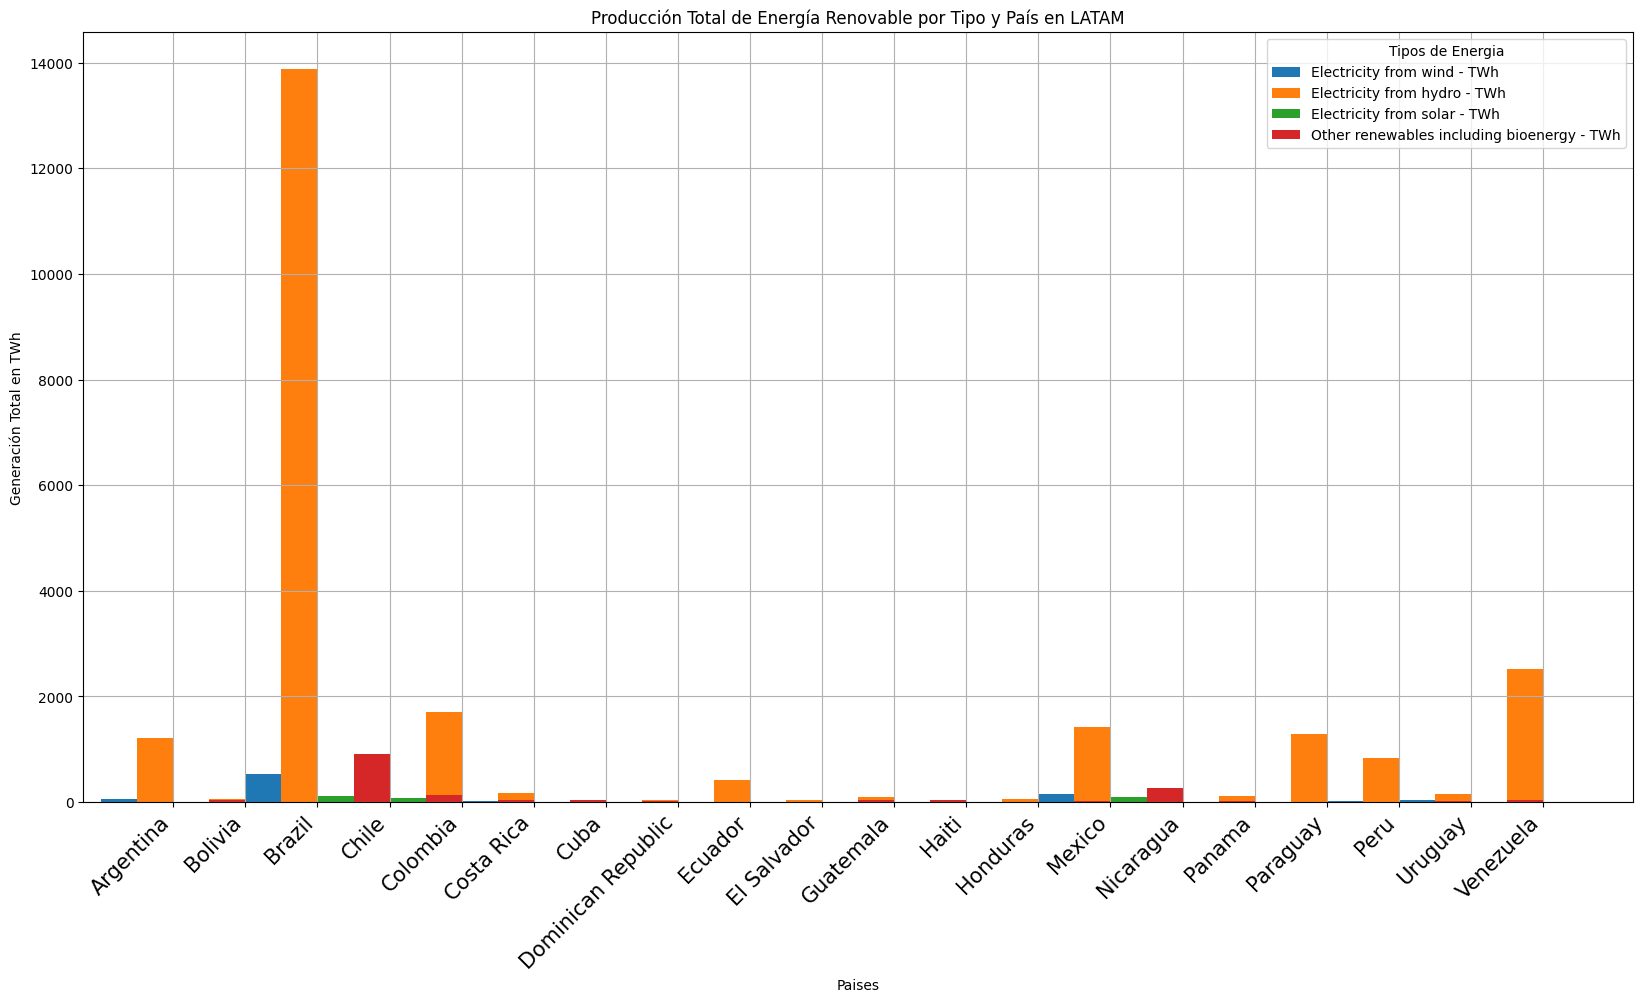

In [4]:
EnergyRenewConsLATAM = DataRenewProd[DataRenewProd['Entity'].isin(LATIN_AMERICAN_COUNTRIES)]
TotalRenewProdByCountry = EnergyRenewConsLATAM.groupby('Entity').sum(numeric_only=True)
energy_columns = ['Electricity from wind - TWh','Electricity from hydro - TWh','Electricity from solar - TWh','Other renewables including bioenergy - TWh']
DataAllCountries = TotalRenewProdByCountry[energy_columns]
DataAllCountries

plt.figure(figsize=(20, 10))
DataAllCountries.plot(kind='bar', figsize=(20, 10), width=2)
plt.title('Producción Total de Energía Renovable por Tipo y País en LATAM')
plt.ylabel('Generación Total en TWh')
plt.xlabel('Paises')
plt.tick_params(axis='x', labelsize=15)
plt.xticks(rotation=45, ha="right")
plt.legend(title='Tipos de Energia')
plt.grid()
plt.show()




Gráfico de Torta: Participación de Energías Renovables

●      Descripción: Muestra el porcentaje de cada tipo de energía renovable en el total del consumo eléctrico.

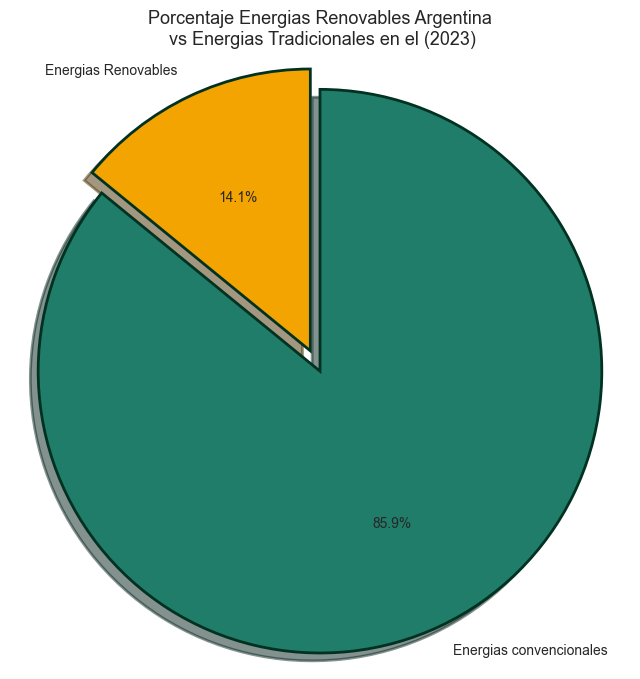

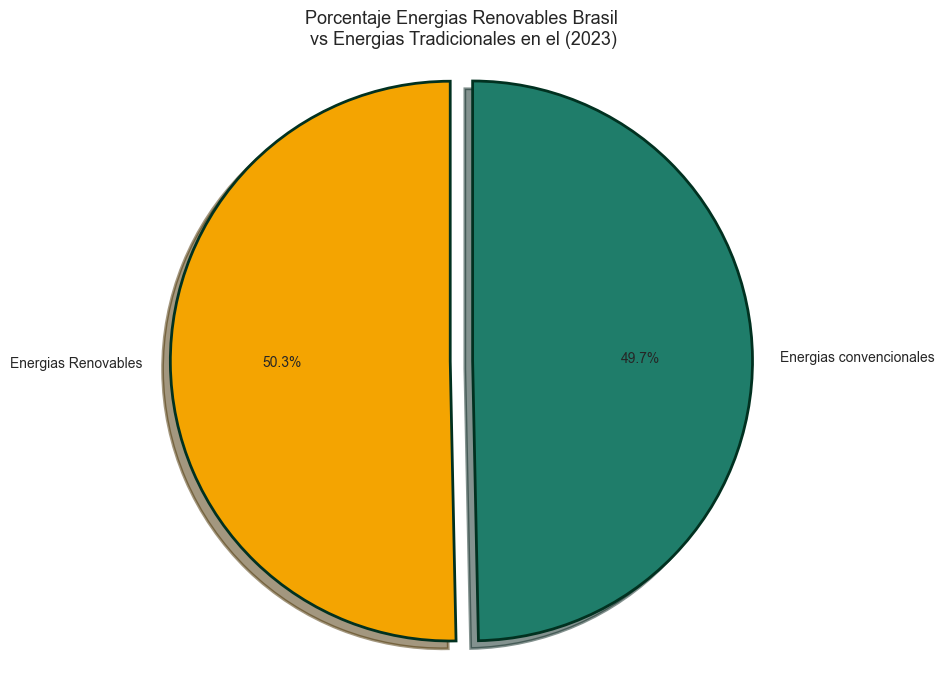

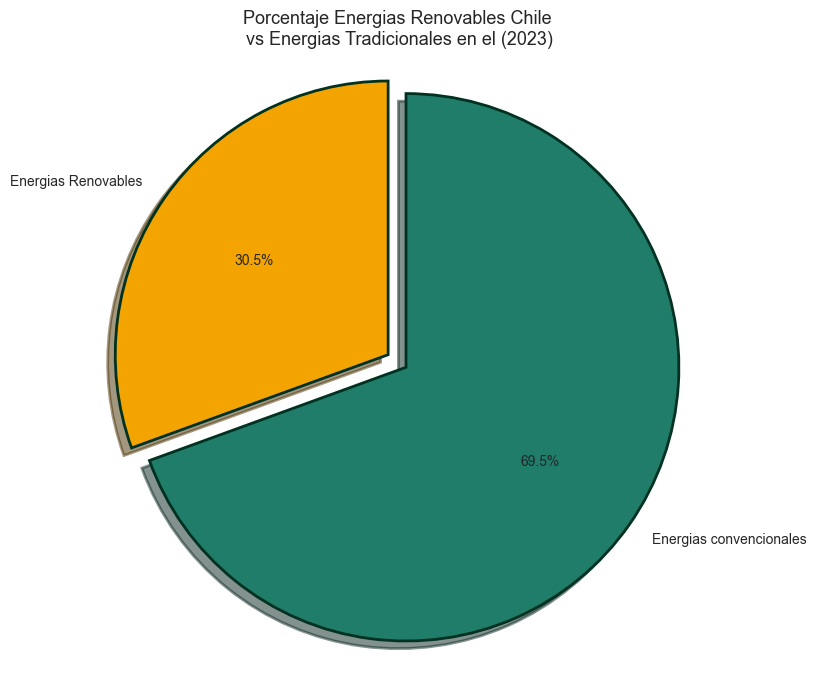

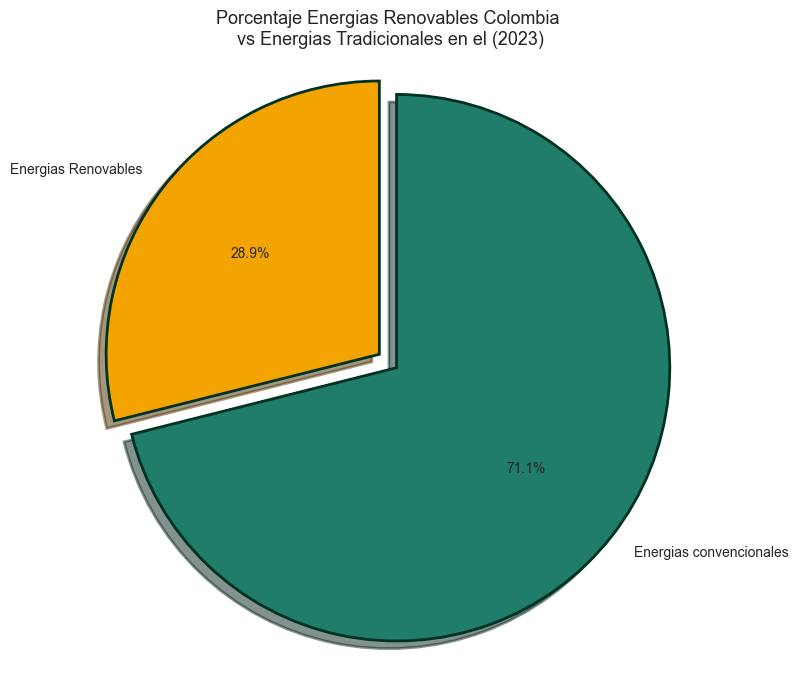

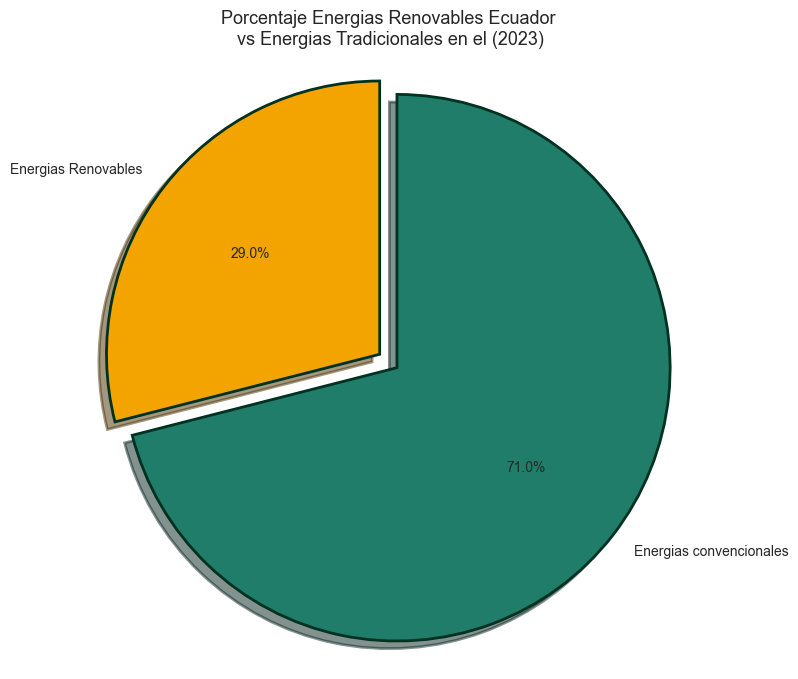

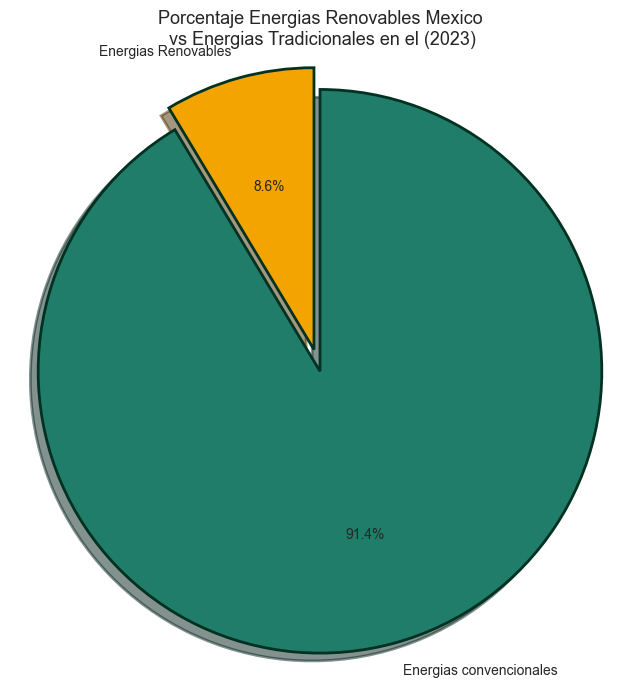

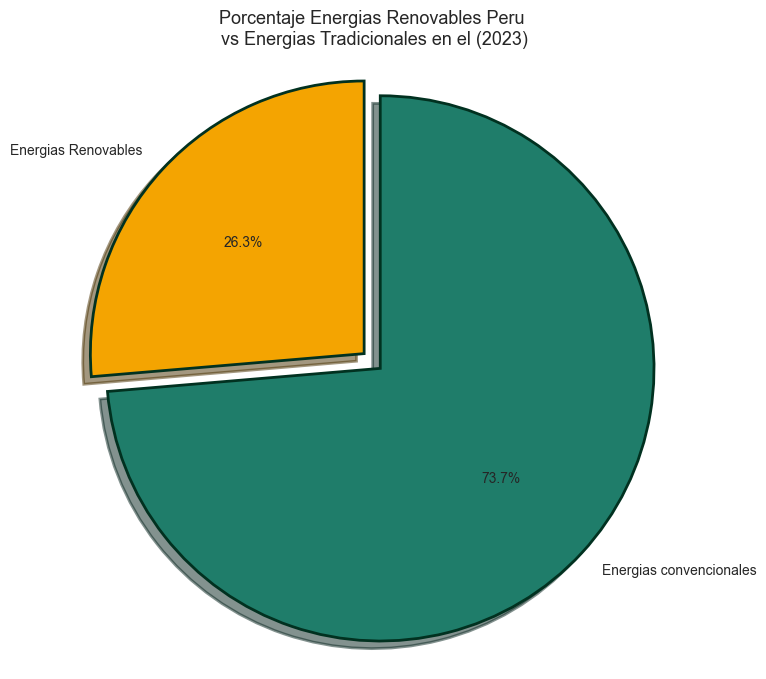

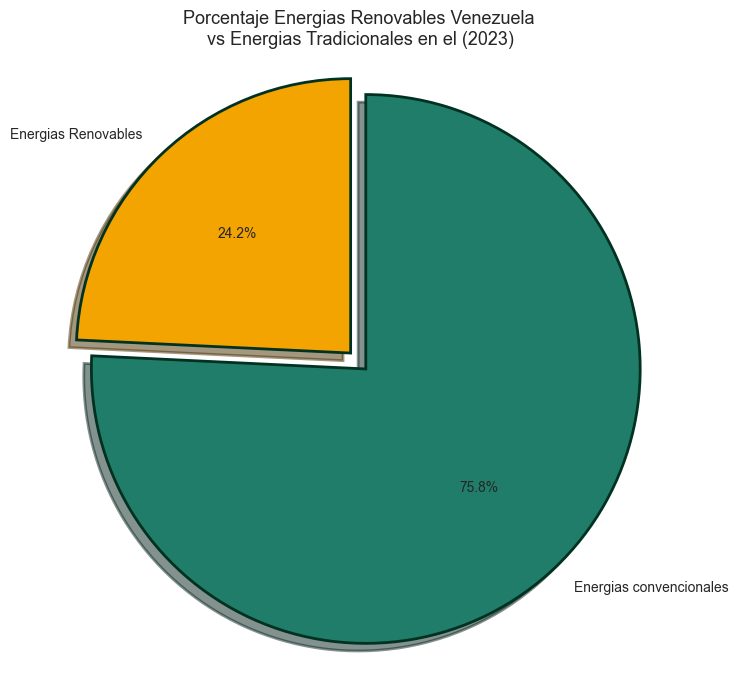

In [46]:
for AnalisisPaises in LATIN_AMERICAN_COUNTRIES:
    PaisSel = DataRenewShareEnergy[DataRenewShareEnergy['Entity'] == AnalisisPaises].copy()
    if PaisSel.empty:
        continue 
    PaisSelOrd = PaisSel.sort_values(by='Year', ascending=False)

    dato_mas_reciente_pais = PaisSelOrd.iloc[0]
    año_analizado = int(dato_mas_reciente_pais['Year'])
    porcentaje_renovables_pais = dato_mas_reciente_pais['Renewables (% equivalent primary energy)']
    porcentaje_no_renovables_pais = 100.0 - porcentaje_renovables_pais
   
    etiquetas_torta = ['Energias Renovables', 'Energias convencionales']
    valores_torta = [porcentaje_renovables_pais, porcentaje_no_renovables_pais]
    colores_torta = ['#F4A401', '#1F7D6A']  
    explode_torta = (0.08, 0) 

    plt.figure(figsize=(8, 8))
    plt.pie(valores_torta, explode=explode_torta, labels=etiquetas_torta, colors=colores_torta, autopct='%1.1f%%', shadow=True, startangle=90, wedgeprops={'linewidth': 2 , 'edgecolor': "#013120"})
    plt.title(f'Porcentaje Energias Renovables {AnalisisPaises}\n vs Energias Tradicionales en el ({año_analizado})', fontsize=13)
    plt.axis('equal')
    plt.show()


<Figure size 1000x600 with 0 Axes>

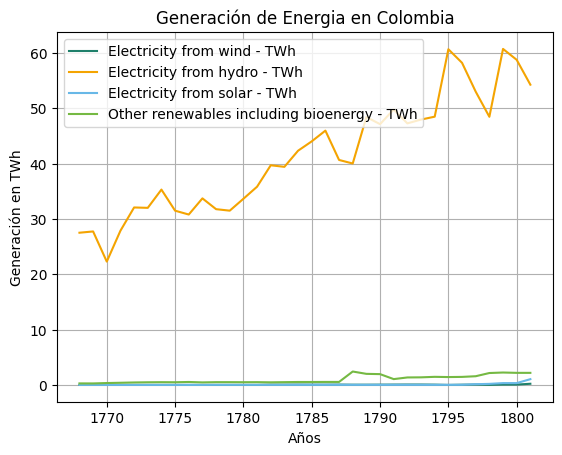

In [6]:
Grupos = DataRenewProd.groupby('Entity')
DatosEnergyCol = Grupos.get_group('Colombia').dropna()
# print (DatosEnergyCol)

color = [
    '#1F806B',
    '#F4A401',
    '#68B8E7',  
    '#75B943',  
]

plt.figure(figsize=(10, 6))
DataAll = DatosEnergyCol[['Electricity from wind - TWh', 'Electricity from hydro - TWh','Electricity from solar - TWh', 'Other renewables including bioenergy - TWh']]
# plt.plot(DatosEnergyCol['Year'], DataAll , label = DataAll.columns)
ax = DataAll.plot(color = color)
plt.title('Generación de Energia en Colombia')
plt.ylabel('Generación en TWh')
plt.xlabel('Años')
plt.legend()
plt.grid()
plt.show()


Gráfico de Área: Comparación entre Consumo de Energía Renovable y

Convencional

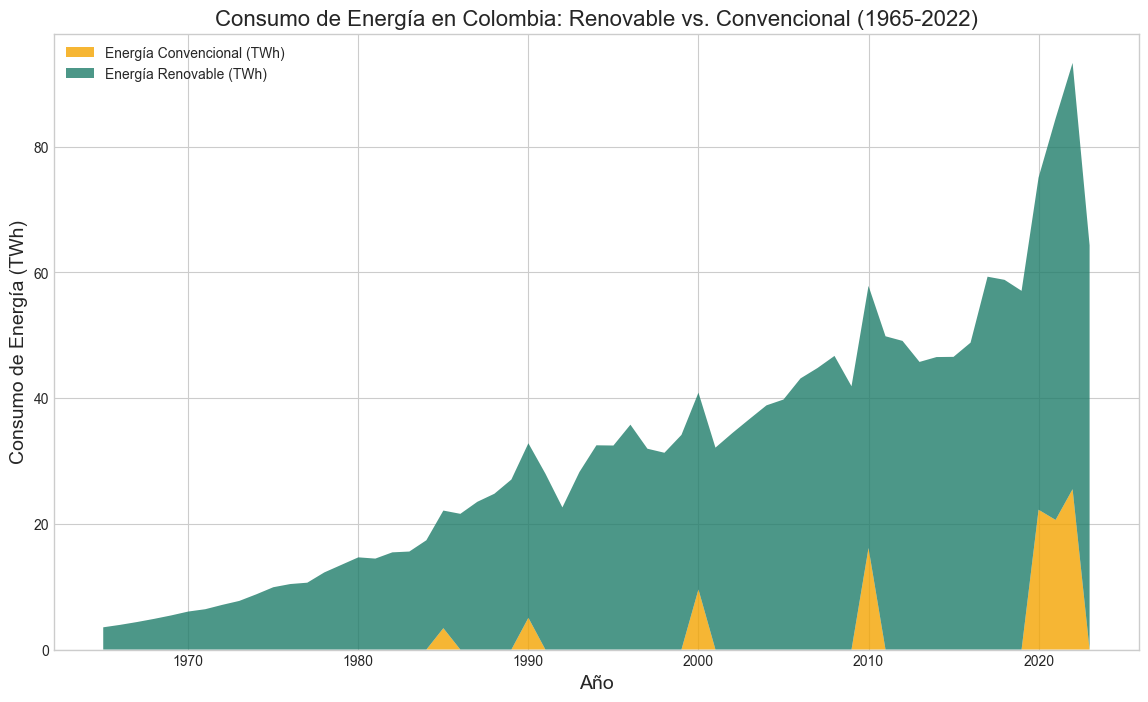

In [43]:
DataEnerConvCol_colombia = DataEnerConvCol[['Year', 'Total_Conventional_TWh']].copy()
DataEnerConvCol_colombia.rename(columns={'Total_Conventional_TWh': 'Conventional_TWh'}, inplace=True)

DataRenewConsCol = DataRenewCons[DataRenewCons['Entity'] == 'Colombia'].copy()

renewable_cols_map = {
    'Other renewables (including geothermal and biomass) electricity generation - TWh': 'Other_Renewables_TWh',
    'Solar generation - TWh': 'Solar_TWh',
    'Wind generation - TWh': 'Wind_TWh',
    'Hydro generation - TWh': 'Hydro_TWh'
}
DataRenewConsCol.rename(columns=renewable_cols_map, inplace=True)

renewable_source_cols = ['Other_Renewables_TWh', 'Solar_TWh', 'Wind_TWh', 'Hydro_TWh']
for col in renewable_source_cols:
    DataRenewConsCol[col] = pd.to_numeric(DataRenewConsCol[col], errors='coerce').fillna(0)

DataRenewConsCol['Renewable_TWh'] = DataRenewConsCol[renewable_source_cols].sum(axis=1)

DataRenewConsCol = DataRenewConsCol[['Year', 'Renewable_TWh']]

df_merged = pd.merge(DataEnerConvCol_colombia, DataRenewConsCol, on='Year', how='outer')
df_merged['Conventional_TWh'] = df_merged['Conventional_TWh'].fillna(0)
df_merged['Renewable_TWh'] = df_merged['Renewable_TWh'].fillna(0)


fig, ax = plt.subplots(figsize=(14, 8))
ax.stackplot(df_merged['Year'],
             df_merged['Conventional_TWh'],
             df_merged['Renewable_TWh'],
             labels=['Energía Convencional (TWh)', 'Energía Renovable (TWh)'],
             colors=['#F4A401', '#1F7D6A'],
             alpha=0.8)

ax.set_title('Consumo de Energía en Colombia: Renovable vs. Convencional (1965-2022)', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Consumo de Energía (TWh)', fontsize=14)
plt.legend()
plt.show()

